<a href="https://colab.research.google.com/github/0sant1ago/phython_laboratory/blob/dev/lab_work(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analytics with `pandas` and `matplotlib`

In this task, you are asked to analyze cryptocurrency data using the pandas and matplotlib libraries.
The task looks like a laboratory work in which you have to fill in the missing cells and answer a series of questions.
 - [Official pandas documentation](https://pandas.pydata.org/)
 - [Official matplotlib documentation](https://matplotlib.org/index.html)

> **Reminder**
>
>Minimum points for crediting this work - **1 point**. If you do not score here 1 point, then you get a failure throughout the course (see slides from the introductory presentation).

## 1. Data (2 points)

Downloading data for work:

In [25]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 252MB/s]


Let's start with the necessary preparations.

In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
#from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mpdates
#from mplfinance import candlestick_ohlc
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Load a pre-prepared dataset from *"coins.csv"* file. Create an object of type `pandas.DataFrame` named `coins` and select the date column as the index.

In [27]:
# Paste your code here.
coins = pd.read_csv("coins.csv")

Let's see what happened

In [28]:
coins.head(37589)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
1,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
3,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
4,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
37584,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
37585,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08
37586,2018-06-06,0.127555,1313.0,1.596436e+07,733.0,ZIL,Zilliqa,0.127555,0.133254,0.124194,0.131766,54667900.0,9.348810e+08


Let's explain the values ​​stored in the columns
 - date - measurement date
 - name - full name of the coin
 - symbol - abbreviated name of the coin
 - price - average coin price per trading day in USD
 - txCount - the number of transactions in the network of this coin
 - txVolume - the volume of coins transferred between addresses in the network of this coin
 - activeAddresses - the number of addresses that made transactions on this day in the network of this coin
 - open - the price of the coin at the beginning of trading on the given day
 - close - the price of the coin at the end of the trading day
 - high - the highest price of this coin during the current trading day
 - low - the lowest price of the given coin during the given trading day
 - volume - trading volume of this coin on exchanges on a given day
 - market - capitalization of this coin on a given day

Let's examine the data. Answer the following questions (insert cells with code and text below):

### 1. How many different coins are there in the dataset? (0.4 points)

In [29]:
print(len(set(coins['name'])))

70


### 2. For what period do we have data? (0.4 points)

In [30]:
print('We have data from: ' + coins['date'][1] + '  until: ' + coins['date'][37587])

We have data from: 2013-04-28  until: 2018-06-06


### 3. Are there gaps in the data? What is the nature of these omissions, what are they most likely caused by? (0.5 points)

In [31]:
coins.isnull().values.any()

True

### 4. Which coin had the highest price and when? (0.2 points)

In [32]:
coins['date'][coins['price'].idxmax(axis = 0)], coins['name'][coins['price'].idxmax(axis = 0)]

('2017-12-17', 'Bitcoin')

### 5. Which coin has the highest and lowest total capitalization? Build a pie chart with proportions. (0.5 points)

Highest total capitalization: Bitcoin
Lowest total capitalization: Ethereum


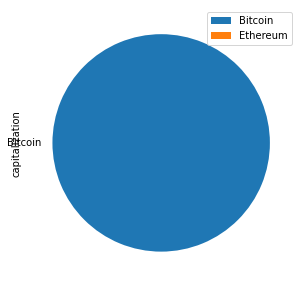

In [33]:
print('Highest total capitalization: ' + coins['name'][coins['market'].idxmax(axis = 0)]) 
print('Lowest total capitalization: ' + coins['name'][coins['market'].idxmin(axis = 0)])
highest_cap = coins['market'][coins['market'].idxmax(axis = 0)]
min_cap = coins['market'][coins['market'].idxmin(axis = 0)]
df = pd.DataFrame({'capitalization': [highest_cap, min_cap]}, index=[coins['name'][coins['market'].idxmax(axis = 0)],
                                                                     coins['name'][coins['market'].idxmin(axis = 0)]])
plot = df.plot.pie(y='capitalization', figsize=(5, 5))

## 2. Visualization (1 point)

The most interesting part of the analyst's job is to carefully look at correctly chosen and constructed charts.

**Implement a function to visualize the prices of the selected currency for the selected date range.**

The chart should show the start and end prices of sales. As well as the minimum and maximum price for that day.
Label the graph and coordinate axes. Add a grid. Increase the image size.
You can try using `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), but you can do without it.

In [34]:
 def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Paste your code here
    df = coins[coins['date'] >= start_date and coins['date'] <= end_date]
    


SyntaxError: ignored

Let's see what happened:

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

There is no data science in this task. It's just that an analyst should be able to build charts, or know ready-made tools.

## 3. Pump and dump (1 point)

Cryptocurrency exchanges still remain a marginal place, a kind of wild west of the financial world. As a consequence, schemes thrive here regarding
honest withdrawal of money. One of them is **pump'n'dump** (pump and dump).

She looks like this. Several large players or many small ones agree to buy together an obscure coin with a low price and trading volume. This leads to an instant rise in price (pump), then inexperienced players come in the hope of making money on such growth. At this point, the organizers of the scheme will start selling everything (dump). The whole process takes from several minutes to several hours.

Your task is to **find the strongest pump'n'dump** of the coin in the given time period. To do this, for each day, we define the number `pnd` equal to the ratio of the maximum price of the coin on the given day to the maximum of the opening and closing prices on the same day. We need to find the day when `pnd` was maximum and the value of `pnd`.

In [51]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Paste your code here
    started = False
    pnb = 0.0
    datee = str()
    for i in range(37588):
      if coins['date'][i] == start_date:
        started = True
      if coins['date'][i] != start_date and started == False:
        continue
      if coins['symbol'][i] != symbol:
        continue
      if coins['high'][i]/(coins['open'][i]*coins['close'][i]) > pnb:
        pnb = coins['high'][i]/max(coins['open'][i], coins['close'][i])
        datee = coins['date'][i]
      if coins['date'][i] == end_date:
        break
    
    print("for coin: " + symbol + "  most severe pump and dump in " + datee + " and had a value of: " + str(pnb))



In [52]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

for coin: BTC  most severe pump and dump in 2017-06-01 and had a value of: 1.0168239281027294


Compare these values ​​for different coins:

In [54]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='LTC', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='XLM', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='XVG', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='ZIL', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='ZEC', start_date='2017-06-01', end_date='2018-06-01')

for coin: BTC  most severe pump and dump in 2017-06-01 and had a value of: 1.0168239281027294
for coin: LTC  most severe pump and dump in 2017-06-01 and had a value of: 1.0284722222222222
for coin: XLM  most severe pump and dump in 2018-06-01 and had a value of: 1.008943295057919
for coin: XVG  most severe pump and dump in 2018-06-01 and had a value of: 1.0133537989255565
for coin: ZIL  most severe pump and dump in 2018-06-01 and had a value of: 1.0068896072923843
for coin: ZEC  most severe pump and dump in 2017-06-01 and had a value of: 1.0492638504432945


## 4. ROI (1 point)

You need to calculate **return on investment (ROI)** in cryptocurrencies over a given period of time.

Payback is defined as the ratio of *portfolio price change* to *portfolio initial price*. The portfolio price is the total value (in USD) of all coins in the portfolio.

`investments` is a dictionary where the keys are the names of the coins, the values ​​are the amount of investments in this coin (in USD).

In [67]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    s_num = 0
    s_den = 0
    for keys in investments:
      for i in range(37588):
        if coins['date'][i] == start_date and coins['symbol'][i] == keys:
          s_num += coins['price'][i]
        if coins['date'][i] == end_date and coins['symbol'][i] == keys:
          s_num -= coins['price'][i]
          break

      s_den += investments[keys]
    print("ROI equals to: " + str(s_num/s_den))

In [68]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

ROI equals to: -0.018939999999999978


In [69]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

ROI equals to: -5.0766599999999995


## 5. Technical analysis (1 point)

**Technical analysis** is a way to predict the behavior of a chart based on some auxiliary values ​​built on the original chart. One of the simplest methods of technical analysis is **[Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Someone believes that the graph touching the border should be reflected from it.

Borders are considered very simply:

$$(MA \pm K\sigma),$$

where `MA` is the `N` day moving average and $\sigma$ is the `N` day moving standard deviation.

Draw **price chart**, **moving average** and **Bollinger bands** with parameters `N (window) = 21`, `K (width) = 2`.

The `rolling` function will help you here to calculate the mean and standard deviation over a sliding window.

Don't forget to label the graph and axes, draw the legend and choose the best location for it.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Conclude whether the Bollinger Rule was followed:**

**Your answer is here**

## 6. Capitalization as an indicator (1 point)

Many people who trade cryptocurrencies like to look at [capitalization](https://academy.binance.com/en/articles/crypto-market-capitalization-explained). Let's understand why.

**Draw two more graphs:**
1. total capitalization of bitcoin (BTC), ether (ETH), eos (EOS), bitcoin cash (BCH), stellar (XLM) and litecoin (LTC)
2. shares of capitalizations of these coins from the total market capitalization.

In this case, use the data starting from 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Analyze the dependence of the share of capitalization of altcoins (other coins, except for bitcoin) on the share of capitalization of bitcoin. What do you think is the reason for this dependence?

**Your answer is here**

## 7. Coin correlations (1 point)

Now we need to take a closer look at the correlations of the average shares of coin capitalizations. In this case, we will look at the average smoothed over the last `window` days until the day `date` with a smoothing coefficient `alpha` for the set of coins `symbols`.

Implement a function that will return a square `DataFrame` with the number of rows and columns equal to the number of coins in question and with correlation values:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

It is quite interesting to take another look at 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Analysis of one strategy (2 points)

Let's take a dreamy example. Let's see how much profit a textbook trading strategy based on moving averages could bring us.

The strategy looks like this: we build two moving averages for the price chart. With a small window (leading moving average) and with a large window (lagging moving average). **We buy when the leading average becomes larger than the lagging one and sell otherwise.**

Let's look at an example:

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

It can be seen that the moving average with a larger window reacts more slowly to price changes. It is on this idea that the trading strategy is based.


**Implement a function** that draws two graphs. The right side will display the price and moving averages. On the left - how many times the size of investments will change when using our strategy and with ordinary investment (we bought and hold, we look at how the price of our purchased currencies grows).

>**Notes:**
>- Let's use only closing prices. In this case, to find out the prices for yesterday, you should use the `shift (1)` method for `Series`.
>- The ratio of closing prices for today and yesterday is **multiplier** for today. At the same time, let's build accumulation graphs for multipliers. Those. if we look at 3 days and on the first day multiplier = 1.5, on the second - 0.5 and on the third - 2, then the graph will look like this: (1.5, 1.5 *0.5, 1.5* 0.5 * 2).
>- When using our new strategy, we will either buy if the leading average becomes larger than the lagging one by some `threshold` (in this case, it is better to divide the difference by the price first), or leave everything as it is. At the same time, of course, when making decisions for today, you need to look only at statistics from the past.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Try different parameter values ​​for different coins and draw conclusions about the applicability of such a model:

**Your answer is here**

## 9. Disclaimer

All examples of the strategies analyzed here are toys and are not suitable for real trading on the stock exchange. Without serious preparation, you will be eaten there with giblets.